## Compensation Data Analysis

In [85]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.cross_decomposition import PLSRegression

import statsmodels.api as sm

import seaborn as sns

pd.set_option('display.max_rows', 100)
plt.rcParams["figure.figsize"] = (20,10)

In [87]:
comp = pd.read_csv('data/prepped_comp_data_interactions.csv', index_col='entry_id')
comp

,log_total_comp,log_salary,log_stock,log_bonus,scaled_years_experience,scaled_years_company,company[AT&T],company[Accenture],company[Adobe],company[Airbnb],...,company_location[WeWork_NYC Area],company_location[WeWork_SF Bay Area],company_location[Workday_SF Bay Area],company_location[Yahoo_SF Bay Area],"company_location[Yandex_Moscow, MC, Russia]",company_location[Yelp_SF Bay Area],company_location[Zillow_SF Bay Area],company_location[Zillow_Seattle Area],company_location[eBay_SF Bay Area],company_location[eBay_Seattle Area]
entry_id,,,,,,,,,,,,,,,,,,,,,
4,6.359576,5.192962,5.959718,2.197336,0.712125,-0.123292,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.153297,4.787500,-6.907755,3.970311,0.896446,-0.467863,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,5.247029,4.700489,4.382039,-6.907755,-0.578121,0.221278,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,5.049862,4.905282,2.079567,2.565026,-0.393800,0.565848,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,5.303310,5.056252,3.258135,3.332240,1.080767,1.254988,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30133,4.744941,4.744941,-6.907755,-6.907755,-0.025158,-0.467863,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30139,5.913506,5.231114,5.010642,3.496538,0.712125,1.254988,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30140,5.356591,5.176155,-6.907755,3.555377,-0.762442,-0.812433,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
RANDOM_STATE = 721
X_train, X_test, _, _ = train_test_split(comp, comp, test_size=0.1, random_state=RANDOM_STATE)

y_log_total_comp = X_train.log_total_comp
y_log_salary = X_train.log_salary
y_log_stock = X_train.log_stock
y_log_bonus = X_train.log_bonus
X = X_train.drop(columns=['log_total_comp', 'log_salary', 'log_stock', 'log_bonus'])

y_test_log_total_comp = X_test.log_total_comp
y_test_log_salary = X_test.log_salary
y_test_log_stock = X_test.log_stock
y_test_log_bonus = X_test.log_bonus
X_test = X_test.drop(columns=['log_total_comp', 'log_salary', 'log_stock', 'log_bonus'])

X
X_test

,scaled_years_experience,scaled_years_company,company[AT&T],company[Accenture],company[Adobe],company[Airbnb],company[Amazon],company[American Express],company[Andela],company[Apple],...,company_location[WeWork_NYC Area],company_location[WeWork_SF Bay Area],company_location[Workday_SF Bay Area],company_location[Yahoo_SF Bay Area],"company_location[Yandex_Moscow, MC, Russia]",company_location[Yelp_SF Bay Area],company_location[Zillow_SF Bay Area],company_location[Zillow_Seattle Area],company_location[eBay_SF Bay Area],company_location[eBay_Seattle Area]
entry_id,,,,,,,,,,,,,,,,,,,,,
1042,0.343483,0.221278,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6488,-0.393800,0.565848,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21860,-0.762442,-0.123292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7900,-0.209479,0.910418,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4392,-0.393800,0.565848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28116,-0.762442,-0.123292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13550,-0.025158,-0.467863,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8130,0.527804,-0.123292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,scaled_years_experience,scaled_years_company,company[AT&T],company[Accenture],company[Adobe],company[Airbnb],company[Amazon],company[American Express],company[Andela],company[Apple],...,company_location[WeWork_NYC Area],company_location[WeWork_SF Bay Area],company_location[Workday_SF Bay Area],company_location[Yahoo_SF Bay Area],"company_location[Yandex_Moscow, MC, Russia]",company_location[Yelp_SF Bay Area],company_location[Zillow_SF Bay Area],company_location[Zillow_Seattle Area],company_location[eBay_SF Bay Area],company_location[eBay_Seattle Area]
entry_id,,,,,,,,,,,,,,,,,,,,,
23789,-0.578121,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11706,0.712125,1.254988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,-0.578121,-0.467863,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
815,-1.131083,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5982,0.343483,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25211,-0.578121,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25710,-0.578121,-0.467863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13958,0.896446,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Selection

In [89]:
num_features = X.columns.size

alphas = 10**np.linspace(10,-2,100)
kf = KFold(n_splits=5, shuffle=True, random_state=0)

def ridge(X, y):
    ridgecv = skl_lm.RidgeCV(alphas=alphas, cv=kf, scoring='neg_mean_squared_error')
    ridgecv.fit(X, y)

    optimal_ridge = skl_lm.Ridge()
    optimal_ridge.set_params(alpha=ridgecv.alpha_)
    optimal_ridge.fit(X, y)

    coefs = pd.Series(optimal_ridge.coef_.flatten(), index=X.columns)
    rmse = np.sqrt(mean_squared_error(y, optimal_ridge.predict(X)))
    
    return {
        'model_type': 'ridge',
        'model': optimal_ridge,
        'intercept': optimal_ridge.intercept_,
        'coefs': coefs,
        'rmse': rmse }

def lasso(X, y):
    lassocv = skl_lm.LassoCV(alphas = alphas, cv=kf, max_iter=10000)
    lassocv.fit(X, y)

    optimal_lasso = skl_lm.Lasso()
    optimal_lasso.set_params(alpha = lassocv.alpha_)
    optimal_lasso.fit(X, y)

    coefs = pd.Series(optimal_lasso.coef_.flatten(), index=X.columns)
    rmse = np.sqrt(mean_squared_error(y, optimal_lasso.predict(X)))
    
    return {
        'model_type': 'lasso',
        'model': optimal_lasso,
        'intercept': optimal_lasso.intercept_,
        'coefs': coefs,
        'rmse': rmse }

def pls(X, y):
    regr = skl_lm.LinearRegression()
    num_components = 7 # num_features
    mse = []
    for i in np.arange(1, num_components):
        pls=PLSRegression(n_components=i)
        score = -1*cross_val_score(pls, X.iloc[:,:i], y, cv=kf, scoring='neg_mean_squared_error').mean()
        mse.append(score)
    mse_per_component = pd.Series(np.array(mse).flatten(), index = np.arange(1, num_components))
    min_component = np.argmin(mse_per_component) + 1

    pls = PLSRegression(n_components=min_component, scale=False)
    pls.fit(X, y)

    coefs = pd.Series(pls.coef_.flatten(), index=X.columns)
    rmse = np.sqrt(mean_squared_error(y, pls.predict(X)))
    
    return {
        'model_type': 'pls',
        'model': pls,
        'intercept': None,
        'coefs': coefs,
        'rmse': rmse,
        'min_component': min_component }

def get_model_type_min_mse(models):
    min_model_type = None
    for index, (model_type, model) in enumerate(models.items()):            
        if index == 0 or model['rmse'] < models[min_model_type]['rmse']:
            min_model_type = model_type
    return min_model_type

def perform_model_selection(X, y, identifier):
    models = {
        'ridge': ridge(X, y),
        'lasso': lasso(X, y),
        'pls': pls(X, y),
    }
    
    print(f'Performing model selection on {identifier}.')
    for model_type in models:
        print(f'{model_type} RMSE:\t', models[model_type]['rmse'])

    best_model_type = get_model_type_min_mse(models)
    best_model = models[best_model_type]
    print(f'Best model is {best_model_type}.')
    
    print('\nIntercept:\t\t', best_model['intercept'], '\n')
    print(best_model['coefs'])
    
    return best_model, models

## Salary Model Selection

In [90]:
best_model_salary, all_models_salary = perform_model_selection(X, y_log_salary, 'log salary')

Performing model selection on log salary.
ridge RMSE:	 0.18821264028742543
lasso RMSE:	 0.32573896649466955
pls RMSE:	 0.24813363327978571
Best model is ridge.

Intercept:		 4.42497802123213 

scaled_years_experience                  0.099482
scaled_years_company                     0.002691
company[AT&T]                           -0.139099
company[Accenture]                      -0.498603
company[Adobe]                          -0.039187
                                           ...   
company_location[Yelp_SF Bay Area]       0.035850
company_location[Zillow_SF Bay Area]     0.001970
company_location[Zillow_Seattle Area]    0.046627
company_location[eBay_SF Bay Area]      -0.103619
company_location[eBay_Seattle Area]     -0.012494
Length: 615, dtype: float64


## Stock Model Selection

In [91]:
best_model_stock, all_models_stock = perform_model_selection(X, y_log_stock, 'log stock')

Performing model selection on log stock.
ridge RMSE:	 2.2598831212725377
lasso RMSE:	 2.8725730063654153
pls RMSE:	 2.736314405586344
Best model is ridge.

Intercept:		 -3.1054183493990246 

scaled_years_experience                  0.304762
scaled_years_company                     0.097757
company[AT&T]                           -4.256646
company[Accenture]                      -2.495514
company[Adobe]                           5.194117
                                           ...   
company_location[Yelp_SF Bay Area]      -1.632283
company_location[Zillow_SF Bay Area]    -1.160567
company_location[Zillow_Seattle Area]   -0.896285
company_location[eBay_SF Bay Area]      -1.744875
company_location[eBay_Seattle Area]     -1.152086
Length: 615, dtype: float64


## Bonus Model Selection

In [92]:
best_model_bonus, all_models_bonus = perform_model_selection(X, y_log_bonus, 'log bonus')

Performing model selection on log bonus.
ridge RMSE:	 2.721760574444795
lasso RMSE:	 3.1086777045213103
pls RMSE:	 3.0087056977361426
Best model is ridge.

Intercept:		 -0.48680458235225377 

scaled_years_experience                  0.255139
scaled_years_company                    -0.222088
company[AT&T]                            2.352657
company[Accenture]                       0.280604
company[Adobe]                           1.971337
                                           ...   
company_location[Yelp_SF Bay Area]       0.129950
company_location[Zillow_SF Bay Area]     0.815769
company_location[Zillow_Seattle Area]    0.478708
company_location[eBay_SF Bay Area]       0.212330
company_location[eBay_Seattle Area]     -0.039970
Length: 615, dtype: float64


## Suggested Negotiation Values

In [93]:
y_pred_log_salary_rmse = best_model_salary['rmse']
y_pred_log_salary = best_model_salary['model'].predict(X_test).flatten()
np.sqrt(mean_squared_error(y_test_log_salary, y_pred_log_salary))

y_pred_salary = np.exp(y_pred_log_salary)
y_pred_salary[y_pred_salary < 0] = 0
y_pred_salary_lower_bound = y_pred_salary * np.exp(y_pred_log_salary_rmse * -1)
y_pred_salary_upper_bound = y_pred_salary * np.exp(y_pred_log_salary_rmse)

y_pred_salary_range = pd.DataFrame(data={
    'predicted_salary_lower_bound': y_pred_salary_lower_bound,
    'predicted_salary': y_pred_salary,
    'predicted_salary_upper_bound': y_pred_salary_upper_bound,
}, index=X_test.index)
y_pred_salary_range

0.18880141857613292

,predicted_salary_lower_bound,predicted_salary,predicted_salary_upper_bound
entry_id,,,
23789,111.857291,135.021835,162.983529
11706,114.171231,137.814970,166.355094
310,145.073978,175.117371,211.382457
815,112.559373,135.869312,164.006511
5982,139.848200,168.809386,203.768150
...,...,...,...
25211,87.574722,105.710586,127.602209
25710,108.904213,131.457204,158.680698
13958,155.778432,188.038613,226.979560


In [94]:
y_pred_log_stock_rmse = best_model_stock['rmse']
y_pred_log_stock = best_model_stock['model'].predict(X_test).flatten()
np.sqrt(mean_squared_error(y_test_log_stock, y_pred_log_stock))

y_pred_stock = np.exp(y_pred_log_stock)
y_pred_stock[y_pred_stock < 0] = 0
y_pred_stock_lower_bound = y_pred_stock * np.exp(y_pred_log_stock_rmse * -1)
y_pred_stock_upper_bound = y_pred_stock * np.exp(y_pred_log_stock_rmse)

y_pred_stock_range = pd.DataFrame(data={
    'predicted_stock_lower_bound': y_pred_stock_lower_bound,
    'predicted_stock': y_pred_stock,
    'predicted_stock_upper_bound': y_pred_stock_upper_bound,
}, index=X_test.index)
y_pred_stock_range

2.478900293051024

,predicted_stock_lower_bound,predicted_stock,predicted_stock_upper_bound
entry_id,,,
23789,5.239400,50.203771,481.050986
11706,3.182134,30.491115,292.164920
310,8.290010,79.434616,761.140046
815,5.470326,52.416496,502.253250
5982,7.977959,76.444553,732.489352
...,...,...,...
25211,0.000414,0.003969,0.038030
25710,0.010176,0.097509,0.934324
13958,10.991546,105.320658,1009.179296


In [95]:
y_pred_log_bonus_rmse = best_model_bonus['rmse']
y_pred_log_bonus = best_model_bonus['model'].predict(X_test).flatten()
np.sqrt(mean_squared_error(y_test_log_bonus, y_pred_log_bonus))

y_pred_bonus = np.exp(y_pred_log_bonus)
y_pred_bonus[y_pred_bonus < 0] = 0
y_pred_bonus_lower_bound = y_pred_bonus * np.exp(y_pred_log_bonus_rmse * -1)
y_pred_bonus_upper_bound = y_pred_bonus * np.exp(y_pred_log_bonus_rmse)

y_pred_bonus_range = pd.DataFrame(data={
    'predicted_bonus_lower_bound': y_pred_bonus_lower_bound,
    'predicted_bonus': y_pred_bonus,
    'predicted_bonus_upper_bound': y_pred_bonus_upper_bound,
}, index=X_test.index)
y_pred_bonus_range

2.7675621418306213

,predicted_bonus_lower_bound,predicted_bonus,predicted_bonus_upper_bound
entry_id,,,
23789,0.005276,0.080227,1.220019
11706,0.820694,12.480345,189.789509
310,0.953192,14.495264,220.430521
815,1.263927,19.220636,292.289595
5982,1.043952,15.875450,241.419112
...,...,...,...
25211,0.306551,4.661743,70.891466
25710,0.030360,0.461687,7.020907
13958,2.995065,45.546162,692.623754


In [96]:
y_pred_total_comp_sum = y_pred_salary + y_pred_stock + y_pred_bonus
y_test_total_comp = np.exp(y_test_log_total_comp)
np.sqrt(mean_squared_error(y_test_total_comp, y_pred_total_comp_sum))

y_pred_total_comp_range = pd.DataFrame(data={
    'predicted_total_comp_lower_bound':
        y_pred_salary_lower_bound + y_pred_stock_lower_bound + y_pred_bonus_lower_bound,
    'predicted_total_comp': y_pred_total_comp_sum,
    'predicted_total_comp_upper_bound':
        y_pred_salary_upper_bound + y_pred_stock_upper_bound + y_pred_bonus_upper_bound,
}, index=X_test.index)
y_pred_total_comp_range

100.14597788908648

,predicted_total_comp_lower_bound,predicted_total_comp,predicted_total_comp_upper_bound
entry_id,,,
23789,117.101966,185.305833,645.254534
11706,118.174059,180.786430,648.309523
310,154.317180,269.047252,1192.953023
815,119.293627,207.506445,958.549356
5982,148.870110,261.129390,1177.676614
...,...,...,...
25211,87.881688,110.376298,198.531705
25710,108.944749,132.016400,166.635930
13958,169.765043,338.905432,1928.782610


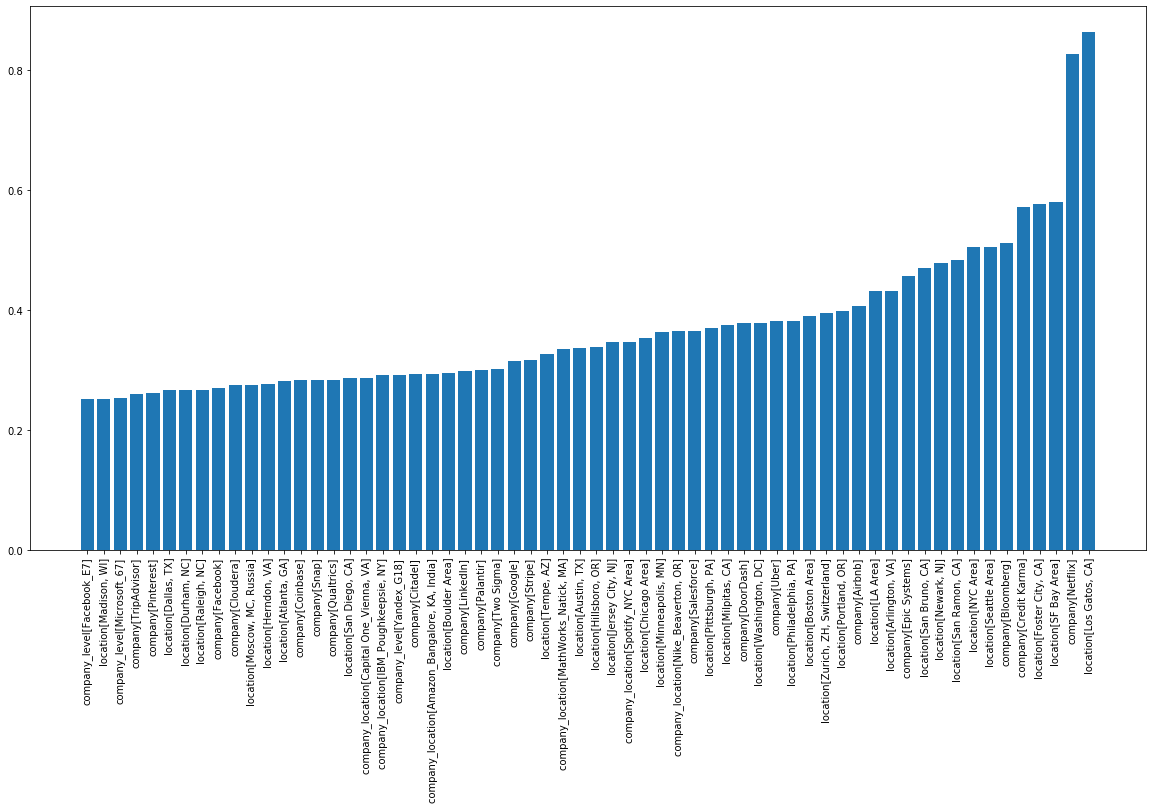

In [97]:
coefs = best_model_salary['coefs']

coefs_increase = best_model_salary['coefs'][best_model_salary['coefs'] > 0.25]
coefs_increase = coefs_increase.sort_values()
x = plt.bar(coefs_increase.index, coefs_increase)
x = plt.xticks(rotation=90)

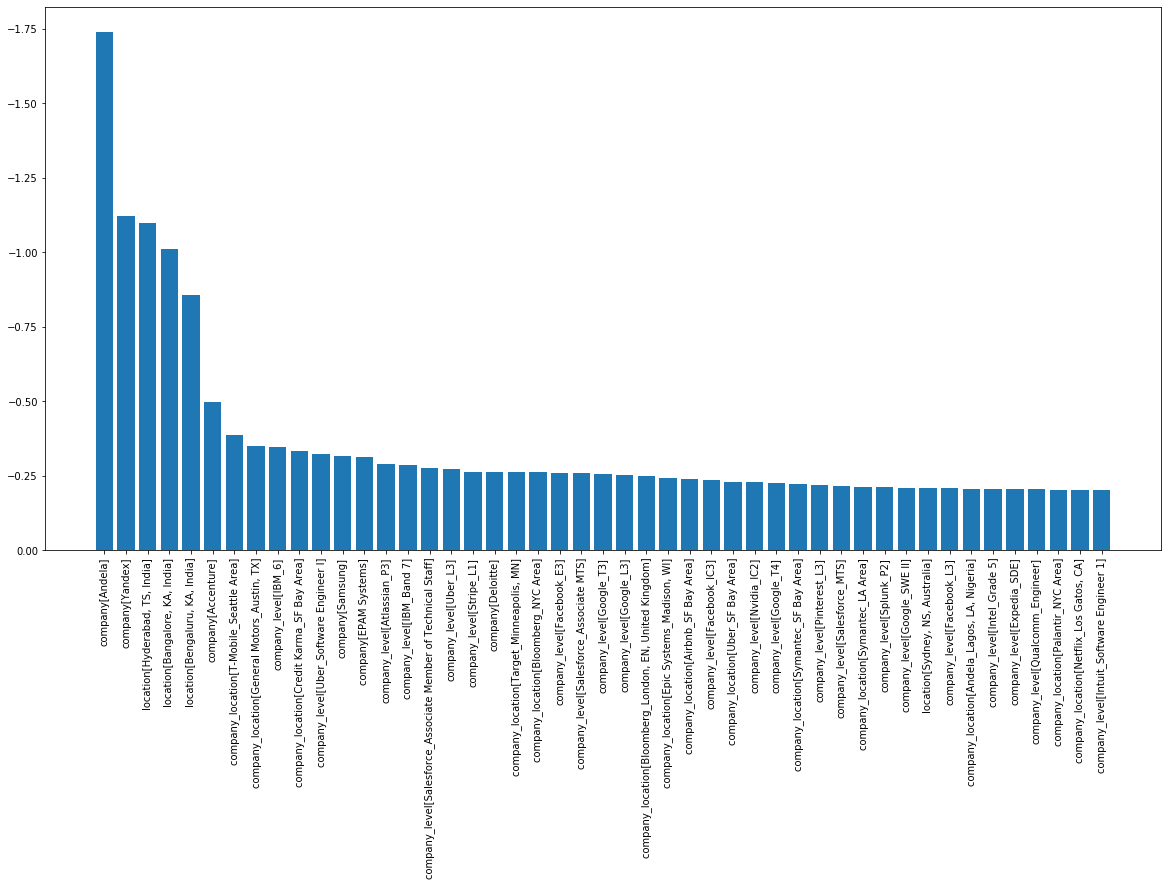

In [98]:
coefs_decrease = best_model_salary['coefs'][best_model_salary['coefs'] < -0.2]
coefs_decrease = coefs_decrease.sort_values()
x = plt.bar(coefs_decrease.index, coefs_decrease)
x = plt.xticks(rotation=90)
x = plt.gca().invert_yaxis()

In [99]:
coefs.filter(like='Google').sort_values().sort_index()
coefs.filter(like='Facebook').sort_values().sort_index()

company[Google]                                        0.314087
company_level[Google_4]                               -0.106014
company_level[Google_5]                               -0.066421
company_level[Google_L3]                              -0.253993
company_level[Google_L4]                              -0.125057
company_level[Google_L5]                              -0.046963
company_level[Google_L6]                               0.063580
company_level[Google_L7]                               0.189297
company_level[Google_SWE II]                          -0.209935
company_level[Google_Senior SWE]                       0.013193
company_level[Google_Staff SWE]                        0.082833
company_level[Google_T3]                              -0.255012
company_level[Google_T4]                              -0.226649
company_level[Google_T5]                              -0.059309
company_location[Google_Austin, TX]                   -0.005875
company_location[Google_Boston Area]    

company[Facebook]                                        0.270461
company_level[Facebook_E3]                              -0.260522
company_level[Facebook_E4]                              -0.028044
company_level[Facebook_E5]                               0.090269
company_level[Facebook_E6]                               0.182187
company_level[Facebook_E7]                               0.251190
company_level[Facebook_IC3]                             -0.234980
company_level[Facebook_IC4]                             -0.031601
company_level[Facebook_IC5]                              0.064003
company_level[Facebook_IC6]                              0.095428
company_level[Facebook_L3]                              -0.208097
company_location[Facebook_Boston Area]                  -0.006015
company_location[Facebook_London, EN, United Kingdom]   -0.082123
company_location[Facebook_NYC Area]                     -0.084521
company_location[Facebook_SF Bay Area]                  -0.164795
company_lo

In [100]:
coefs.filter(like='San Fran').sort_values()
coefs.filter(like='NY').sort_values()

Series([], dtype: float64)

company_location[Bloomberg_NYC Area]          -0.262013
company_location[Palantir_NYC Area]           -0.201851
company_location[American Express_NYC Area]   -0.162995
company_location[Capital One_NYC Area]        -0.153015
company_location[Uber_NYC Area]               -0.150305
company_location[LinkedIn_NYC Area]           -0.099258
company_location[JPMorgan Chase_NYC Area]     -0.093401
company_location[Google_NYC Area]             -0.086631
company_location[Facebook_NYC Area]           -0.084521
company_location[Two Sigma_NYC Area]          -0.050558
company_location[IBM_NYC Area]                -0.042092
company_location[Goldman Sachs_NYC Area]      -0.019920
company_location[Etsy_NYC Area]                0.020626
company_location[Morgan Stanley_NYC Area]      0.028174
company_location[Amazon_NYC Area]              0.050388
company_location[Adobe_NYC Area]               0.065834
company_location[SquareSpace_NYC Area]         0.066525
company_location[MongoDB_NYC Area]             0